In [1]:
# 2022/03/10

# SQL 연습

# 데이터베이스 이름 : ubion

In [2]:
# 고객 정보 수집 DB - table name : user_info

# 기본키 : ID >> varchar(32) // primary key

# 비밀번호 : password >> varchar(32) // Not Null

# 이름 : name >> varchar(32) // Not Null

# 전화번호 : phone >> varchar(32) // Not Null

# 주소 : ads >> varchar(64) // Null 허용

# 성별 : gender >> int // Not Null

# 나이 : age >> int // Not Null

# 가입 날짜 : regit_date >> varchar(32) // Not Null

In [3]:
# show databases;

# create datebase 데이터베이스명;

# drop datebases 데이터베이스명;

# use 데이터베이스명;

# create table 테이블명 (필드이름1 필드타입1 제약조건1, 필드이름2 필드타입2 제약조건2);

# show tables;

# desc 테이블명;

# alter table 테이블명 add 필드이름(컬럼명) 필드타입 제약조건;

# alter table 테이블명 drop 필드이름;

# alter table 테이블명 change 현재필드이름 변경필드이름 필드타입 제약조건;

# alter table 테이블명 modify column 필드이름 필드타입 제약조건;

# insert into 테이블명 values('varchar', int);

# insert into 테이블명(필드이름1, 필드이름2) values('varchar', int);

# select * from 테이블명;

# select 테이블명1.필드이름1, 테이블명1.필드이름2, 테이블명2.필드이름1, 테이블명2.필드이름2 from 테이블명1 left join 테이블명2 on 테이블명1.key = 테이블명2.key; 

# update 테이블명 set ads(변경필드명) = 'ad.varchar' where name = 'name.varchar';

# delete from 테이블명 where name = 'name.varchar';

In [4]:
# 주소에 따른 거주자 - table name : ads_info

# 주소 : ads varchar(64) primary key

# 구성원수 : register_count int not null

# 거주기간 : period_of_residence int not null

# 계약종류 : Contract_type int not null

### join 하기 ###

# user_info >> ID, name, ads

# ads_info >> register_count, period_of_residence, contract_type

In [5]:
# 파이썬으로 연결하기

import pymysql

In [6]:
# pymysql.connect : sql과 파이썬 연결

_db = pymysql.connect(
    user = 'root',
    passwd = 'dbtjr2293!',
    host = 'localhost',
    db = 'ubion',
    charset = 'utf8'

)

# user = user name
# pass = 설정한 패스워드
# host = DB가 존재하는 host
# db = 연결할 데이터베이스 이름
# charset = 인코딩 설정

In [7]:
cursor = _db.cursor(pymysql.cursors.DictCursor)

# cursor 만들기
# cursor란 쿼리문에 의해서 반환되는 결과값들을 저장하는 메모리공간

In [15]:
select_sql = 'select * from user_info'

cursor.execute(select_sql) # execute는 cursor 안에 있는 sql 실행
result = cursor.fetchall() # fetchall은 cursor에 있는 내용을 result에 모둔 붙임
print(result)
result

[{'ID': 'test', 'password': '1234', 'name': '고길동', 'phone': '01012345678', 'ads': '서울시 강북구 쌍문동', 'gender': 1, 'age': 45, 'regit_date': '20220310'}, {'ID': 'test2', 'password': '2345', 'name': '둘리', 'phone': '01098765432', 'ads': '북극 어딘가', 'gender': 1, 'age': 10, 'regit_date': '20220310'}, {'ID': 'test3', 'password': '2345', 'name': '마이콜', 'phone': '01056568732', 'ads': '고길동 옆 집', 'gender': 1, 'age': 28, 'regit_date': '20220310'}, {'ID': 'test4', 'password': '2837', 'name': '또치', 'phone': '01033728412', 'ads': '동물원', 'gender': 2, 'age': 4, 'regit_date': '20220310'}]


[{'ID': 'test',
  'password': '1234',
  'name': '고길동',
  'phone': '01012345678',
  'ads': '서울시 강북구 쌍문동',
  'gender': 1,
  'age': 45,
  'regit_date': '20220310'},
 {'ID': 'test2',
  'password': '2345',
  'name': '둘리',
  'phone': '01098765432',
  'ads': '북극 어딘가',
  'gender': 1,
  'age': 10,
  'regit_date': '20220310'},
 {'ID': 'test3',
  'password': '2345',
  'name': '마이콜',
  'phone': '01056568732',
  'ads': '고길동 옆 집',
  'gender': 1,
  'age': 28,
  'regit_date': '20220310'},
 {'ID': 'test4',
  'password': '2837',
  'name': '또치',
  'phone': '01033728412',
  'ads': '동물원',
  'gender': 2,
  'age': 4,
  'regit_date': '20220310'}]

In [16]:
import pandas as pd # 판다스 df형태로 만들기

dt = pd.DataFrame(result) # df는 딕션너리의 key값을 column으로, values값을 

dt

,ID,password,name,phone,ads,gender,age,regit_date
0,test,1234,고길동,01012345678,서울시 강북구 쌍문동,1,45,20220310
1,test2,2345,둘리,01098765432,북극 어딘가,1,10,20220310
2,test3,2345,마이콜,01056568732,고길동 옆 집,1,28,20220310
3,test4,2837,또치,01033728412,동물원,2,4,20220310


In [13]:
insert_sql = 'insert into user_info values (%s,%s,%s,%s,%s,%s,%s,%s)' # sql은 %s로만 받아드림
values = ['test4','2837','또치','01033728412','동물원',2,4,'20220310']

cursor.execute(insert_sql, values)
_db.commit()

IntegrityError: (1062, "Duplicate entry 'test4' for key 'user_info.PRIMARY'")

In [14]:
delete_sql = "delete from user_info where ID = '1'"

cursor.execute(delete_sql)

0

In [ ]:
input_ID = input('ID : ')
input_pass = input('password : ')
input_name = input('name : ')
input_phone = input('phone : ')
input_ads = input('address : ')
input_gender = input('gender : ') # 앞에 int 설정하지 않아도 가능
input_age = input('age : ') # 앞에 int 설정하지 않아도 가능
input_regit_date = input('regit_date : ')

input_list = [input_ID, input_pass, input_name, input_phone, input_ads, input_gender, input_age, input_regit_date]

cursor.execute(insert_sql, input_list)
_db.commit()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

# 맥북에서 matplotlib 한글사용

<function matplotlib.pyplot.show(close=None, block=None)>

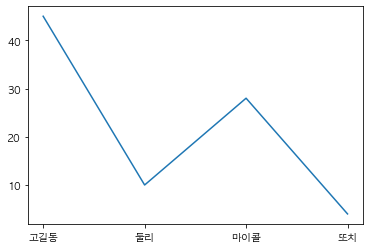

In [ ]:
input_name_2 = dt['name'].values.tolist()
input_age_2 = dt['age'].values.tolist()

plt.plot(input_name_2, input_age_2)
plt.show